#Regression Assignment

MODEL 1: Goals vs Points
R² Score: 0.8462
Coefficient (goals): 2.1768
Intercept: 3.7372



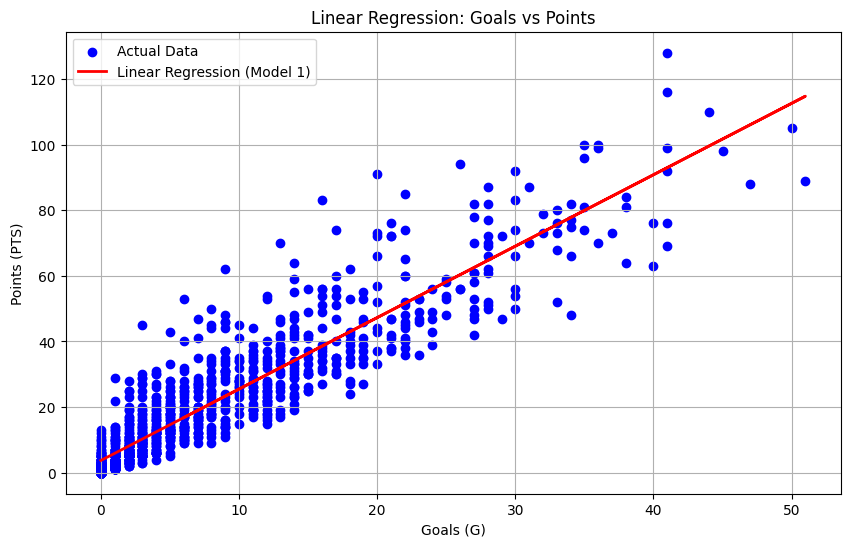

MODEL 2: Goals + Assists vs Points
R² Score: 1.0000
Coefficient (goals): 1.0000
Coefficient (assists): 1.0000
Intercept: 0.0000



In [15]:
import numpy as np
import pandas as pa
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')
y = np.array(df.PTS)

x_goals = np.array(df[['G']])
x_multi = np.array(df[['G','A']])

# Linear regression
model1 = LinearRegression()
model1.fit(x_goals, y)
y_pred1 = model1.predict(x_goals)
r2_1 = r2_score(y, y_pred1)

# Multiple linear regression
model2 = LinearRegression()
model2.fit(x_multi, y)
y_pred2 = model2.predict(x_multi)
r2_2 = r2_score(y, y_pred2)

print("MODEL 1: Goals vs Points")
print(f"R² Score: {r2_1:.4f}")
print(f"Coefficient (goals): {model1.coef_[0]:.4f}")
print(f"Intercept: {model1.intercept_:.4f}")
print()

# Plot for linear regression
plt.figure(figsize=(10, 6))
plt.scatter(x_goals, y, color='blue', label='Actual Data')
plt.plot(x_goals, y_pred1, color='red', linewidth=2, label='Linear Regression (Model 1)')
plt.xlabel('Goals (G)')
plt.ylabel('Points (PTS)')
plt.title('Linear Regression: Goals vs Points')
plt.legend()
plt.grid(True)
plt.show()


print("MODEL 2: Goals + Assists vs Points")
print(f"R² Score: {r2_2:.4f}")
print(f"Coefficient (goals): {model2.coef_[0]:.4f}")
print(f"Coefficient (assists): {model2.coef_[1]:.4f}")
print(f"Intercept: {model2.intercept_:.4f}")
print()

I notice that the multiple regression is accurate compared to the linear regression. The linear regraaion is also noisy compared to the multiple regression.

#Logistic Regression

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
try:
    df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv', encoding='latin-1')
except UnicodeDecodeError:
    df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv', encoding='ISO-8859-1')

# Clean and prepare data
df = df.fillna(0)

# Create features
features = ['Appearances', 'Years since joining']
X = df[features]
# Convert the target variable to numeric
y = df['Death1'].apply(lambda x: 1 if x == 'YES' else 0)


fit = LogisticRegression().fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5428571428571428
Confusion Matrix:
 [[18  1]
 [15  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.95      0.69        19
           1       0.50      0.06      0.11        16

    accuracy                           0.54        35
   macro avg       0.52      0.50      0.40        35
weighted avg       0.52      0.54      0.43        35



#Find your own regression

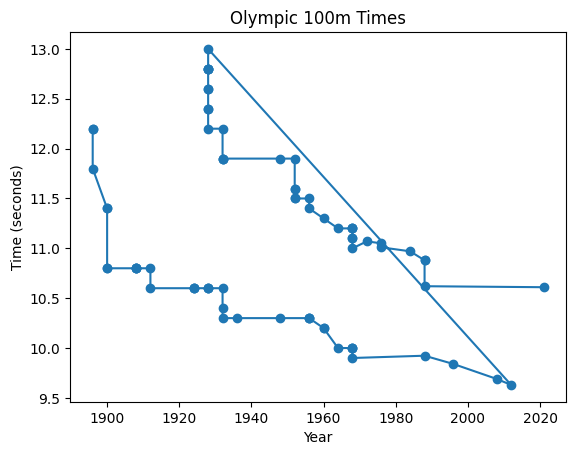

Predicted 2024 time: 10.57 seconds
Predicted 2300 time: 7.06 seconds

Note: This assumes times keep improving at the same rate forever.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')

plt.plot(df['Games'], df['Time'], 'o-')
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.title('Olympic 100m Times')
plt.show()

latest_year = df['Games'].iloc[-1]
latest_time = df['Time'].iloc[-1]

improvement_rate = (df['Time'].iloc[0] - df['Time'].iloc[-1]) / (df['Games'].iloc[-1] - df['Games'].iloc[0])

years_ahead_2024 = 2024 - latest_year
years_ahead_2300 = 2300 - latest_year

pred_2024 = latest_time - improvement_rate * years_ahead_2024
pred_2300 = latest_time - improvement_rate * years_ahead_2300

print(f"Predicted 2024 time: {pred_2024:.2f} seconds")
print(f"Predicted 2300 time: {pred_2300:.2f} seconds")
print(f"\nNote: This assumes times keep improving at the same rate forever.")